# SME0104 - Cálculo Numérico
- Professor Antonio Castelo Filho

## Projeto 2 - Aplicações de curvas B-splines em imagens

## Membros

- Felipe Cadavez Oliveira     11208558
- Giovanni Shibaki Camargo    11796444
- João Victor Sene Araujo     11796382
- Lucas Keiti Anbo Mihara     11796472

## Bibliotecas Utilizadas

In [1]:
import imutils
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from random import randrange
from scipy import interpolate as interp
from numpy.polynomial.polynomial import Polynomial

!pip install bezier # Comando utilizado para instalar a biblioteca bezier no Google Collab
import bezier
import seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 


## Biblioteca OpenCV2

OpenCV é uma biblioteca de código aberto que possui diversos algoritmos de visão computacional oferecendo módulos de Processamento de Imagens, Análise de vídeo, reconstrução 3d, detecção de objetos, dentre outros...

Neste projeto, utilizaremos apenas as funções relacionadas à detecção de borda em objetos bidimensionais, para assim obtermos pontos equidistantes na borda do objeto a através de uma foto.

A partir dos pontos obtidos pelo uso da biblioteca, aplicaremos alguns dos conceitos vistos na disciplina para a criação de curvas B-Splines de forma a permitir que o usuário possa modificar alguns dos pontos de borda, alterando a curva formada sem que as regiões distantes dos pontos selecionados sejam afetados.


In [10]:
# Leitura da imagem
im = cv2.imread('fig1.jpg')
height = im.shape[0]
width = im.shape[1]

# Definindo número de pontos equidistantes no contorno da figura
numDots = 50

# Obtendo o Thresholding da imagem para que os possíveis objetos sejam detectados pela biblioteca
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

# Obter a lista de contornos encontrada pela biblioteca
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Ordenando a lista de contornos encontrada de acordo com a área total do objeto contornado
largest_areas = sorted(contours, key=cv2.contourArea)
sortedValues = np.linspace(0, largest_areas[-2].shape[0]-1, num=numDots, dtype=int)
contourPoints = largest_areas[-2][sortedValues]

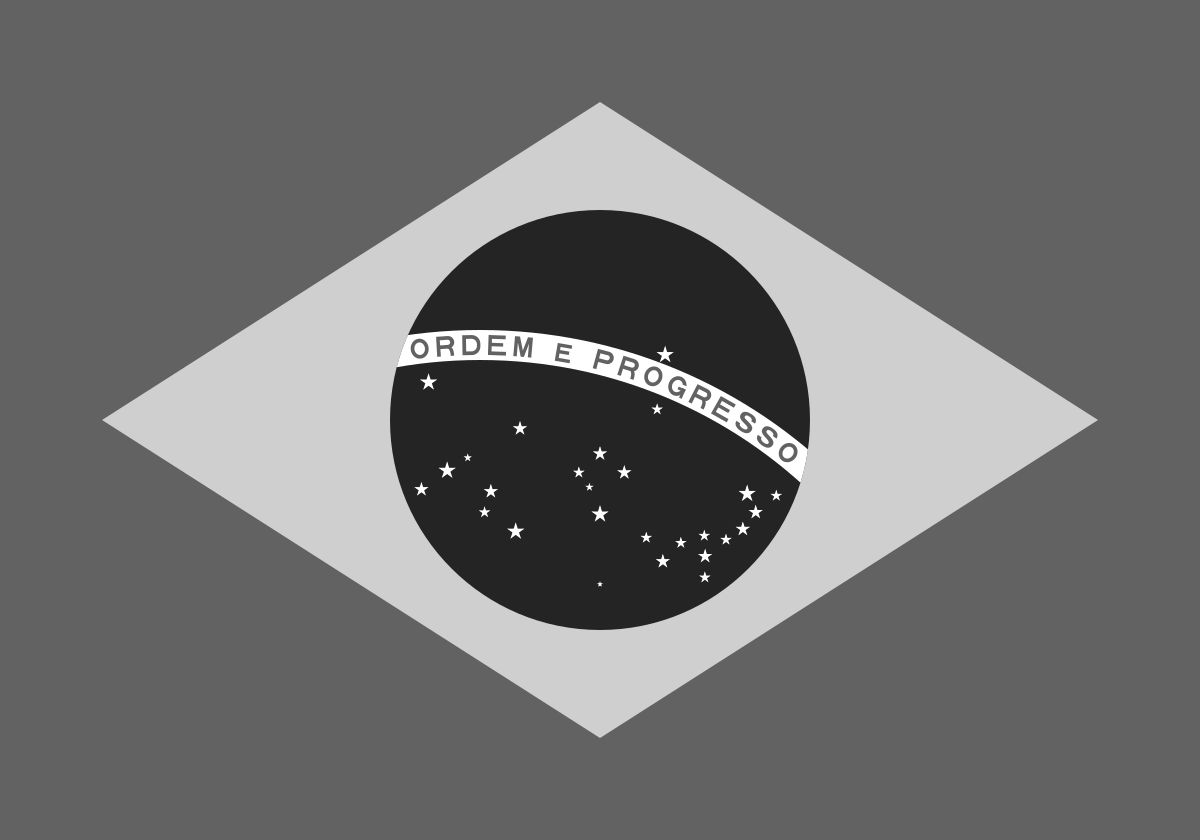

-1

In [16]:
im2 = cv2.imread('brflag.png')
imgray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

cv2_imshow(imgray2)
cv2.waitKey(0)

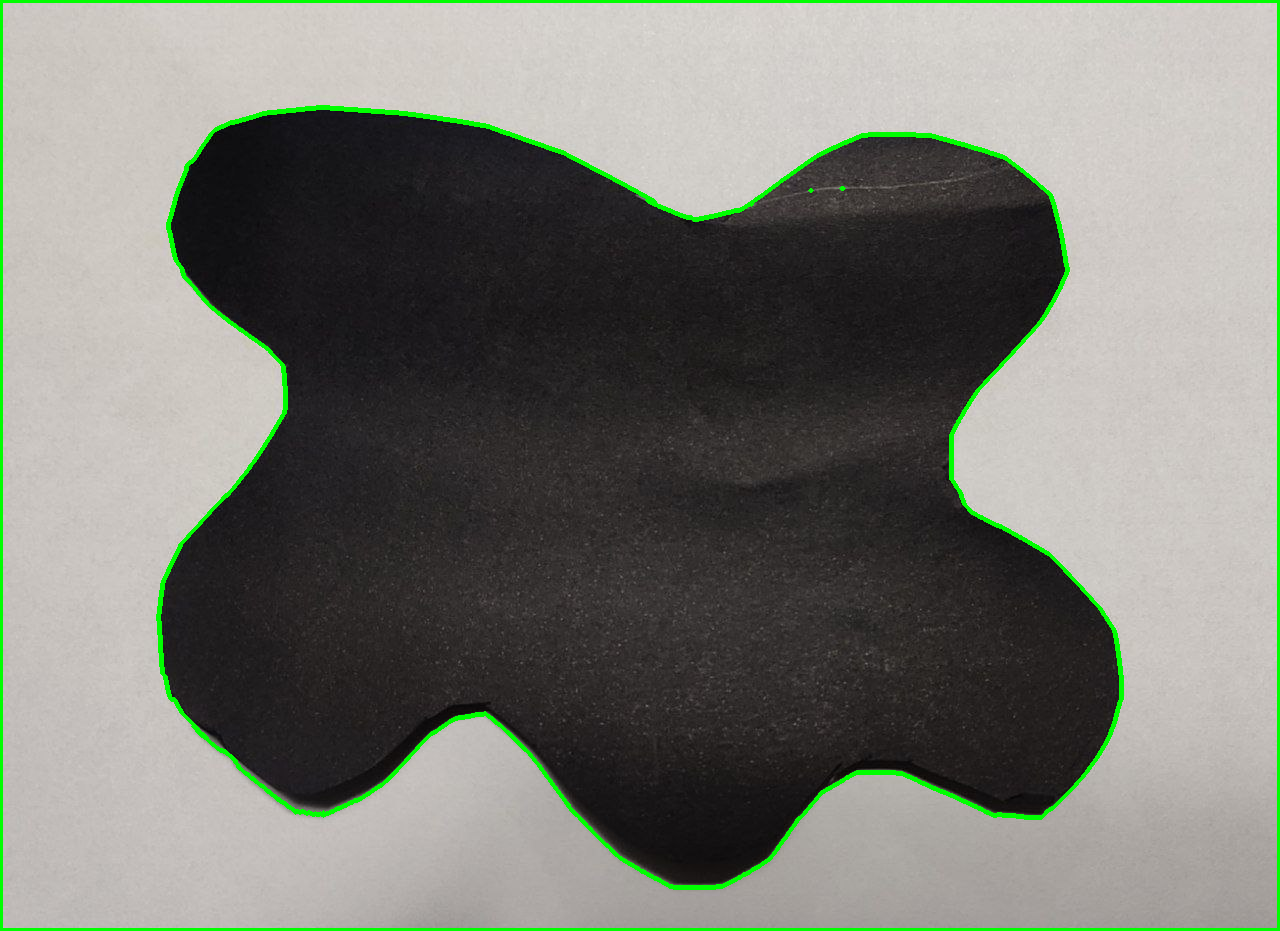

In [12]:
# Mostrando todos os contornos encontrados
cv2.drawContours(im, contours, -1, (0, 255, 0), 3)
  
cv2_imshow(im)
cv2.waitKey(0)
cv2.destroyAllWindows()

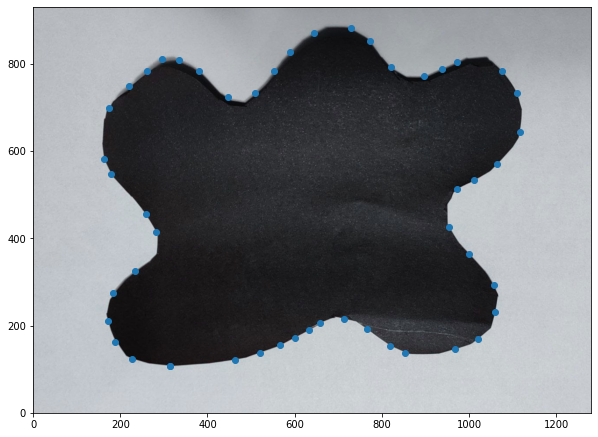

In [11]:
# Lista com as coordenadas de cada ponto do contorno
x = []
y = []
for i in range(0, numDots-1, 1):
  x.append(contourPoints[i][0][0])
  y.append(contourPoints[i][0][1])

# Fechando a curva, isto é, adicionando ao fim o ponto de inicio
x.insert(numDots, x[0])
y.insert(numDots, y[0])

# Plotando a imagem original juntamente com os N pontos selecionados de sua borda
plt.rcParams["figure.figsize"] = [10, 12]
fig, ax = plt.subplots()
ax.imshow(im, extent=[0, width, 0, height], origin='lower')
plt.scatter(x, y)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


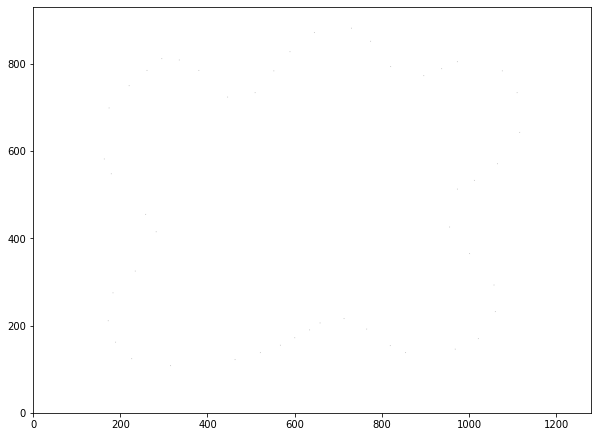

In [ ]:
# Criando matriz Width x Height
matrix = np.zeros((im.shape))

# Nessa matriz, inserir os pontos RGB
# (255, 255, 255) em todos os pontos
# (0, 0, 0) onde está os pontos
for i in range(height):
  for j in range(width):
    matrix[i, j] = (255, 255, 255)

for i in range(numDots-1):
  pos1 = x[i]
  pos2 = y[i]
  matrix[pos2, pos1] = (0, 0, 0)

plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
ax.imshow(matrix, extent=[0, width, 0, height], origin='lower')
plt.show()

## Free End Condition
> https://hal.archives-ouvertes.fr/hal-03017566v2/document

Abaixo, uma aplicação de Splines cúbicos com condição de fim livre.

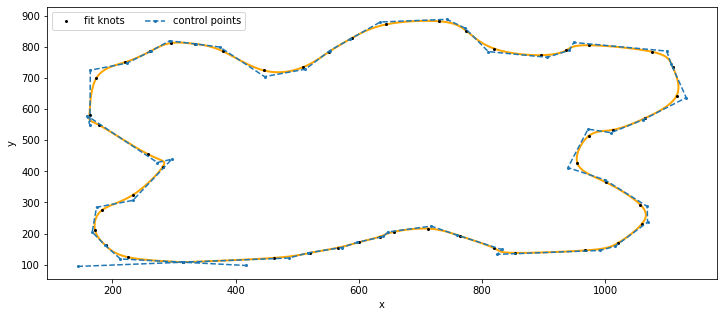

In [ ]:
# fit knots
dx = np.array(x)
y = np.array(y)
Px=np.concatenate(([0],x,[0]))
Py=np.concatenate(([0],y,[0]))

# interpolation equations
n=len(x)
phi=np.zeros((n+2,n+2))
for i in range(n):
    phi[i+1,i]=1
    phi[i+1,i+1]=4
    phi[i+1,i+2]=1

# end condition constraints
phi[0,0]=1
phi[0,1]=-2
phi[0,2]=1
phi[n+1,n-1]=1
phi[n+1,n]=-2
phi[n+1,n+1]=1

# passage matrix
phi_inv = np.linalg.inv(phi)

# control points
Qx=6*phi_inv.dot(Px)
Qy=6*phi_inv.dot(Py)

# figure plot
plt.figure(figsize=(12, 5))
t=np.linspace(0,1,num=101)
for k in range(0,n-1):
    x_t=1.0/6.0*(((1-t)**3)*Qx[k]+(3*t**3-6*t**2+4)*Qx[k+1]+(-3*t**3+3*t**2+3*t+1)*Qx[k+2]+(t**3)*Qx[k+3])
    y_t=1.0/6.0*(((1-t)**3)*Qy[k]+(3*t**3-6*t**2+4)*Qy[k+1]+(-3*t**3+3*t**2+3*t+1)*Qy[k+2]+(t**3)*Qy[k+3])  
    plt.plot(x_t,y_t,'k',linewidth=2.0,color='orange')
plt.plot(x, y, 'ko', label='fit knots',markersize=2)
plt.plot(Qx, Qy, 'o--', label='control points',markersize=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', ncol=2)
plt.savefig('cubic_spline_free_end.png')
plt.show()

## End-to-end Tangent Continuity
> https://hal.archives-ouvertes.fr/hal-03017566v2/document

Abaixo, uma aplicação de Splines cúbicos com continuidade tangente.

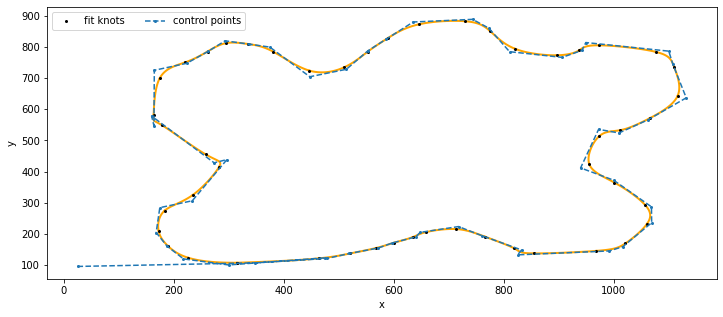

In [ ]:
# https://github.com/kawache/Python-B-spline-examples

# fit knots
x = np.array(x)
y = np.array(y)
Px=np.concatenate(([0],x,[0]))
Py=np.concatenate(([0],y,[0]))

# interpolation equations
n=len(x)
phi=np.zeros((n+2,n+2))
for i in range(n):
    phi[i+1,i]=1
    phi[i+1,i+1]=4
    phi[i+1,i+2]=1

# end condition constraints
phi[0,0]=-1
phi[0,1]=4
phi[0,2]=-6
phi[0,3]=4
phi[0,4]=-1
phi[n+1,n-3]=-1
phi[n+1,n-2]=4
phi[n+1,n-1]=-6
phi[n+1,n]=4
phi[n+1,n+1]=-1

# passage matrix
phi_inv = np.linalg.inv(phi)

# control points
Qx=6*phi_inv.dot(Px)
Qy=6*phi_inv.dot(Py)

# figure plot
plt.figure(figsize=(12, 5))
t=np.linspace(0,1,num=101)
for k in range(0,n-1):
    x_t=1.0/6.0*(((1-t)**3)*Qx[k]+(3*t**3-6*t**2+4)*Qx[k+1]+(-3*t**3+3*t**2+3*t+1)*Qx[k+2]+(t**3)*Qx[k+3])
    y_t=1.0/6.0*(((1-t)**3)*Qy[k]+(3*t**3-6*t**2+4)*Qy[k+1]+(-3*t**3+3*t**2+3*t+1)*Qy[k+2]+(t**3)*Qy[k+3])  
    plt.plot(x_t,y_t,'k',linewidth=2.0,color='orange')
plt.plot(x, y, 'ko', label='fit knots',markersize=2)
plt.plot(Qx, Qy, 'o--', label='control points',markersize=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', ncol=2)
plt.savefig('cubic_spline_not-a-knot.png')
plt.show()


## Interpolação B-splines da Biblioteca Scipy.Interpolate

Abaixo, a Interpolação de B-splines com grau 3 através da biblioteca Scipy.

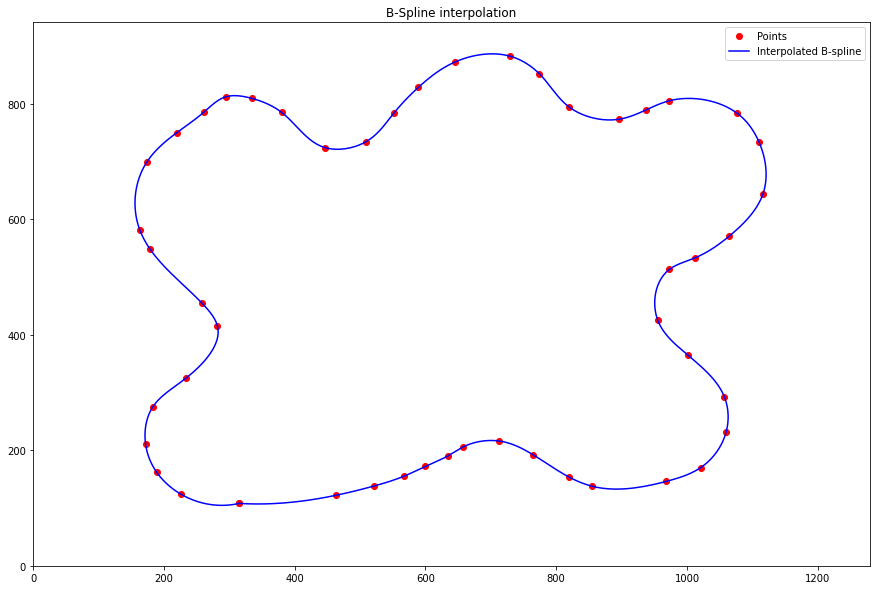

In [ ]:
# Observação: a interpolação é feita em ordem, isto é, caso vá inserir um novo ponto esse ponto tem que ser inserido na posição correta seguindo
# a ordem. -> Sentido anti-horário

tck,u = interp.splprep([x,y],k=3,s=0)
u=np.linspace(0,1,num=500,endpoint=True)
out = interp.splev(u,tck)

x1 = np.array(out)[0]
y1 = np.array(out)[1]

plt.figure()
plt.plot(x, y, 'ro', out[0], out[1], 'b')
plt.legend(['Points', 'Interpolated B-spline', 'True'],loc='best')
plt.axis([0, width, 0, height+10])
plt.rcParams["figure.figsize"] = [15, 10]
plt.title('B-Spline interpolation')
plt.show()

## Interpolação utilizando o método de Bezier

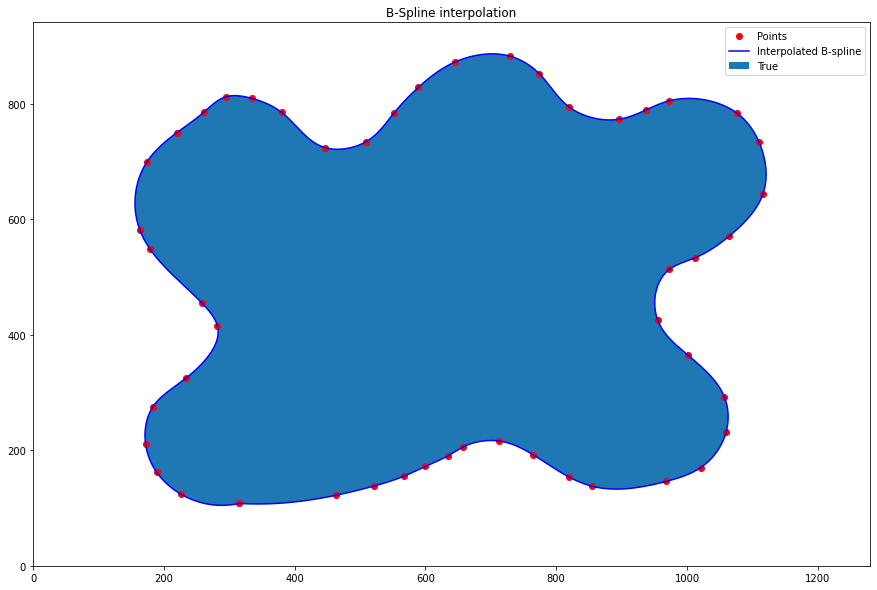

In [ ]:
plt.figure()
plt.plot(x, y, 'ro', out[0], out[1], 'b')
plt.fill_between(x1, y1)
plt.legend(['Points', 'Interpolated B-spline', 'True'],loc='best')
plt.axis([0, width, 0, height+10])
plt.rcParams["figure.figsize"] = [15, 12]
plt.title('B-Spline interpolation')
plt.show()

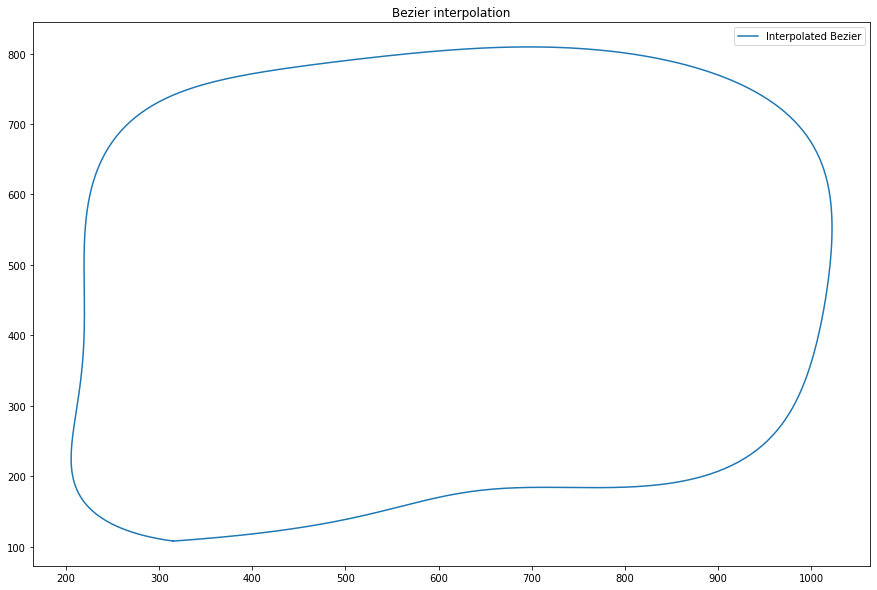

In [ ]:
nodes = []
nodes.append(np.array(x))
nodes.append(np.array(y))

curve = bezier.Curve(nodes, np.array(x).shape[0]-1)
curve.plot(num_pts=500)
plt.legend(['Interpolated Bezier', 'True'],loc='best')
plt.title('Bezier interpolation')
plt.show()

## Comparação da aplicação da Interpolação de B-splines de acordo com o número de pontos fornecidos.

Abaixo, um gráfico comparando a Interpolação de B-splines de acordo com o número de pontos da borda fornecido (10, 20, 50 e 100 pontos).

In [ ]:
def getxy(num):
  sortedValues = np.linspace(0, largest_areas[-2].shape[0]-1, num=num, dtype=int)
  contourPoints = largest_areas[-2][sortedValues]
  x = []
  y = []

  for i in range(0, num-1, 1):
    x.append(contourPoints[i][0][0])
    y.append(contourPoints[i][0][1])

  # Fechando a curva, isto é, adicionando ao fim o ponto de inicio
  x.insert(num, x[0])
  y.insert(num, y[0])
  return x, y

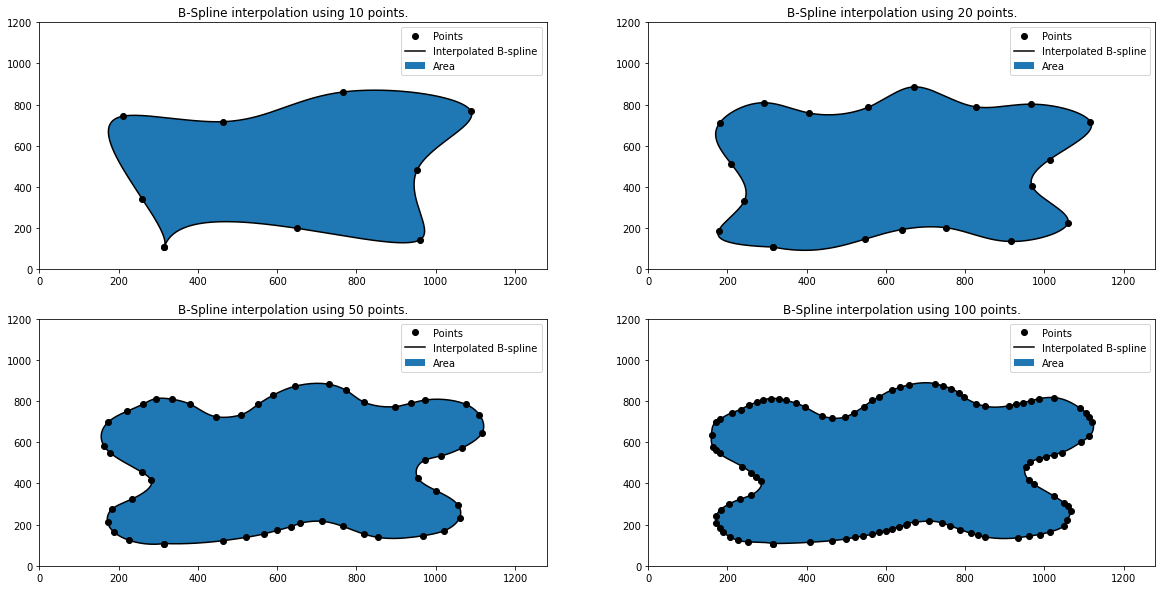

In [ ]:
fig, axs = plt.subplots(2, 2)
aux = [10, 20]
aux2 = [50, 100]
count = 0

for i in aux:
  x, y = getxy(i)

  tck,u = interp.splprep([x,y],k=3,s=0)
  u=np.linspace(0,1,num=500,endpoint=True)
  out = interp.splev(u,tck)

  x1 = np.array(out)[0]
  y1 = np.array(out)[1]

  axs[0, count].plot(x, y, 'ro', out[0], out[1], 'b', color='black')
  axs[0, count].fill_between(x1, y1)
  axs[0, count].legend(['Points', 'Interpolated B-spline', 'Area'],loc='best')
  axs[0, count].axis([0, width, 0, 1200])
  axs[0, count].set_title('B-Spline interpolation using '+str(i)+" points.")
  count += 1

count = 0

for i in aux2:
  x, y = getxy(i)

  tck,u = interp.splprep([x,y],k=3,s=0)
  u=np.linspace(0,1,num=500,endpoint=True)
  out = interp.splev(u,tck)

  x1 = np.array(out)[0]
  y1 = np.array(out)[1]

  axs[1, count].plot(x, y, 'ro', out[0], out[1], 'b', color='black')
  axs[1, count].fill_between(x1, y1)
  axs[1, count].legend(['Points', 'Interpolated B-spline', 'Area'],loc='best')
  axs[1, count].axis([0, width, 0, 1200])
  axs[1, count].set_title('B-Spline interpolation using '+str(i)+" points.")
  count += 1

plt.rcParams["figure.figsize"] = [20, 12]
plt.show()

## Exportando imagem vetorizada como PNG

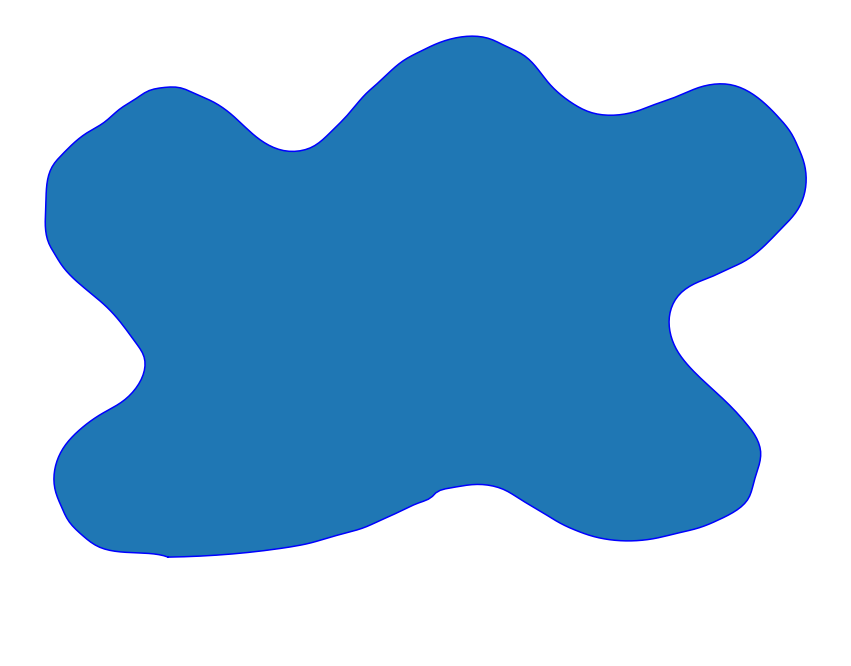

In [ ]:
plt.figure()
plt.plot(out[0], out[1], 'b')
plt.fill_between(x1, y1)
plt.axis('off')
plt.rcParams["figure.figsize"] = [15, 12]
plt.savefig("out.png", transparent=True)